## 필요 라이브러리 import

In [3]:
import requests
import json
import pandas as pd

## API를 통해 월별 데이터 함수 정의

In [11]:
def get_month_BIT(market,year,month):
    url = "https://api.upbit.com/v1/candles/months"
    # api에 전달할 매개변수
    queryparams ={
        "market" : market,
        "to" : f"{year}-{month:02d}-01 00:00:00",
        "count" : 1
    }
    # api에 요청
    headers = {"accept": "application/json"}
    res = requests.get(url, headers=headers,params=queryparams)
    
    # 요청이 성공했을 경우 : code 200
    if res.status_code == 200:
        try:
            data = res.json()[0]
            
            # 필요 데이터
            high_price = data["high_price"] # 고가
            low_price = data["low_price"] # 저가
            candle_acc_trade_price = data["candle_acc_trade_price"] #  누적거래 금액
            candle_acc_trade_volume = data["candle_acc_trade_volume"] #누적 거래량
            
            return(high_price,low_price,candle_acc_trade_price,candle_acc_trade_volume)
        
        except Exception as e: # 예외처리
            raise Exception(e)
          
    else:
        res.status_code == 400
    
    
# 종목 - 비트코인(원화) 
market = "KRW-BTC"

# 월 데이터
month_data = []

# 2020년 1월 ~ 2022년12월 까지 월 데이터를 [] 에 저장.
for year in range(2020,2023):
    for month in range(1,13):
        if year == 2022 and month == 13:
            break
            
        # get_month_BIT()를 호출 하여 data에 저장
        data = get_month_BIT(market,year,month)
        
        month_data.append(data) # 월 데이터 리스트에 추가
        
        
        
# 월 데이터를 DataFrame 으로 변환

df = pd.DataFrame(month_data,columns=['고가','저가','누적 거래대금','누적 거래량'])
df['고가'] = df['고가'].apply(lambda x: '{:,.0f} 원'.format(x))
df['저가'] = df['저가'].apply(lambda x: '{:,.0f} 원'.format(x))
df['누적 거래대금'] = df['누적 거래대금'].apply(lambda x: '{:,.0f} 원'.format(x))
df['누적 거래량'] = df['누적 거래량'].apply(lambda x: '{:,.0f} 개'.format(x))

index = [(f"{year}년 {month}월") for year in range(2020, 2023) for month in range(1, 13) if not (year == 2022 and month == 13)]
df.index = pd.Index(index,name="월")

df.to_csv('monthly_BIT_.csv',encoding='utf-8-sig')

df

,고가,저가,누적 거래대금,누적 거래량
월,,,,
2020년 1월,"8,996,000 원","7,546,000 원","749,631,042,779 원","88,753 개"
2020년 2월,"10,882,000 원","7,910,000 원","1,448,009,639,610 원","151,081 개"
2020년 3월,"12,044,000 원","10,306,000 원","1,608,632,370,096 원","141,681 개"
2020년 4월,"10,980,000 원","5,489,000 원","2,661,304,476,282 원","345,310 개"
2020년 5월,"11,435,000 원","7,529,000 원","1,524,309,595,907 원","171,520 개"
2020년 6월,"12,163,000 원","10,121,000 원","2,109,939,228,783 원","188,722 개"
2020년 7월,"12,230,000 원","10,756,000 원","947,354,527,391 원","82,843 개"
2020년 8월,"13,580,000 원","10,700,000 원","1,020,143,920,567 원","86,752 개"
2020년 9월,"14,382,000 원","12,871,000 원","2,030,225,335,110 원","147,985 개"


In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 # 
matplotlib.rcParams['axes.unicode_minus'] = False 



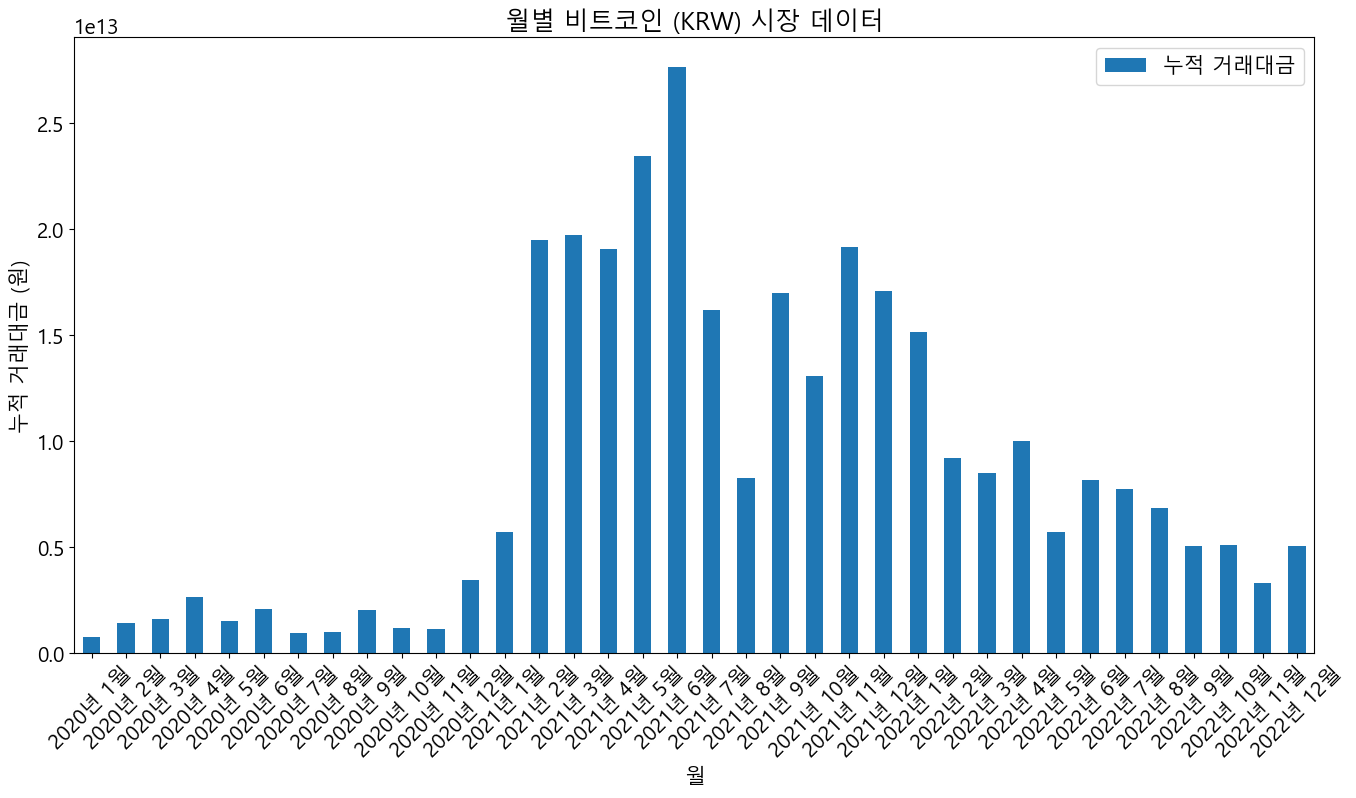

In [10]:
# CSV 파일에서 데이터 읽기
df = pd.read_csv('monthly_BIT.csv', index_col=0)

# '원' 문자 제거
df['누적 거래대금'] = df['누적 거래대금'].str.replace(' 원', '')


# # ',' 제거 및 숫자로 변환
df['누적 거래대금'] = pd.to_numeric(df['누적 거래대금'].str.replace(',', ''))


# # 막대 그래프 생성

ax = df.plot(kind='bar',figsize=(16,8))


# 그래프 제목과 축 라벨 설정
plt.title('월별 비트코인 (KRW) 시장 데이터')
plt.xlabel('월')
plt.ylabel('누적 거래대금 (원)')


# x축 라벨 회전하여 가독성 향상
plt.xticks(rotation=45)

# 그래프 표시
plt.show()
